# Helper Functions

In [1]:
# Loads a dataset from the Datasets directory
def relative_path(path):
    return 'Datasets/{}'.format(path)

In [2]:
def print_enumeration(collection):
    for num, value in enumerate(collection, start=1):
        print('{0}. {1}'.format(num, value))

# Bed Analysis
I'm analyzing the ICU Bed By County Dataset for the sake of getting some information. <br> 
Datasets are found here: https://www.kaggle.com/jaimeblasco/icu-beds-by-county-in-the-us

## Import Modules

In [3]:
import numpy as np
import pandas as pd

## Load Dataset

In [4]:
dataset_path = 'icu-beds-by-county-in-the-us/data-FPBfZ.csv'
actual_path = relative_path(dataset_path)

In [5]:
data = pd.read_csv(actual_path)

In [6]:
data.head()

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
0,Alabama,Autauga,6,55036,10523,19.1,1754.0
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0
2,Alabama,Barbour,5,26201,6150,23.5,1230.0
3,Alabama,Bibb,0,22580,4773,21.1,NaN
4,Alabama,Blount,6,57667,13600,23.6,2267.0


In [7]:
states = data.State.unique()

In [8]:
print_enumeration(states)

1. Alabama
2. Alaska
3. Arizona
4. Arkansas
5. California
6. Colorado
7. Connecticut
8. Delaware
9. District of Columbia
10. Florida
11. Georgia
12. Hawaii
13. Idaho
14. Illinois
15. Indiana
16. Iowa
17. Kansas
18. Kentucky
19. Louisiana
20. Maine
21. Maryland
22. Massachusetts
23. Michigan
24. Minnesota
25. Mississippi
26. Missouri
27. Montana
28. Nebraska
29. Nevada
30. New Hampshire
31. New Jersey
32. New Mexico
33. New York
34. North Carolina
35. North Dakota
36. Ohio
37. Oklahoma
38. Oregon
39. Pennsylvania
40. Rhode Island
41. South Carolina
42. South Dakota
43. Tennessee
44. Texas
45. Utah
46. Vermont
47. Virginia
48. Washington
49. West Virginia
50. Wisconsin
51. Wyoming


## Filter Dataset

In [9]:
# Example of filtering data
filter_function = data['State']=='Alaska'
data[filter_function].head()

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
67,Alaska,Aleutians East,0,3338,510,15.3,NaN
68,Alaska,Aleutians West,0,5784,707,12.2,NaN
69,Alaska,Anchorage,73,298225,43608,14.6,597.0
70,Alaska,Bethel,0,17957,2082,11.6,NaN
71,Alaska,Bristol Bay,0,917,164,17.9,NaN


In [10]:
# Prints the number of Counties per State
for num, state in enumerate(states, start=1):
    state_data = data[data['State']==state]
    
    print('{1} ({0})'.format(state, 'Counties: {}'.format(len(state_data.County.unique())).ljust(14)))

Counties: 67   (Alabama)
Counties: 29   (Alaska)
Counties: 15   (Arizona)
Counties: 75   (Arkansas)
Counties: 58   (California)
Counties: 64   (Colorado)
Counties: 8    (Connecticut)
Counties: 3    (Delaware)
Counties: 1    (District of Columbia)
Counties: 67   (Florida)
Counties: 159  (Georgia)
Counties: 5    (Hawaii)
Counties: 44   (Idaho)
Counties: 102  (Illinois)
Counties: 92   (Indiana)
Counties: 99   (Iowa)
Counties: 105  (Kansas)
Counties: 120  (Kentucky)
Counties: 64   (Louisiana)
Counties: 16   (Maine)
Counties: 24   (Maryland)
Counties: 14   (Massachusetts)
Counties: 83   (Michigan)
Counties: 87   (Minnesota)
Counties: 82   (Mississippi)
Counties: 115  (Missouri)
Counties: 56   (Montana)
Counties: 93   (Nebraska)
Counties: 17   (Nevada)
Counties: 10   (New Hampshire)
Counties: 21   (New Jersey)
Counties: 33   (New Mexico)
Counties: 62   (New York)
Counties: 100  (North Carolina)
Counties: 53   (North Dakota)
Counties: 88   (Ohio)
Counties: 77   (Oklahoma)
Counties: 36   (Oreg

## Dropping Missing Data
We want to look at the relationship between the number of ICU beds and the number of people (aged 60+) that use each bed.

There's no point in looking at rows without ICU Beds:
* from analysis of the dataset, when #ICU Beds is 0, then the #Residents per bed is NaN *(makes sense)*
* it may skew the results

In [11]:
bed_data = data.dropna()
bed_data.shape

(1476, 7)

In [12]:
# Checking if data is accurately recorded (i.e. droping hospitals without beds is the same as dropping nan rows).
bed_data[bed_data['ICU Beds'] != 0].shape

(1476, 7)

## Analyze the data

Article about COVID-19 (how long does it take to recover from COVID-19):<br>
https://www.who.int/docs/default-source/coronaviruse/who-china-joint-mission-on-covid-19-final-report.pdf#:~:text=Using%20available%20preliminary%20data%2C,severe%20or%20critical%20disease.

From prelimiary data from the source above:
* mild patients take 2 weeks to recover
* severe / critical patients take 3-6 weeks to recover

The dataset is:
* reported from the most recent financial cost report, **filed annually**

In [13]:
# Transforms the data

# Best case: all critical patients recover within 3 weeks
def determine_preparedness_best_case(row):
    return row['Residents Aged 60+ Per Each ICU Bed'] <= 17

# Average case: all critical patients recover within 4.5 weeks
def determine_preparedness_avg_case(row):
    return row['Residents Aged 60+ Per Each ICU Bed'] <= 11

# Worst case: all critical patients recover within 6 weeks
def determine_preparedness_worst_case(row):
    return row['Residents Aged 60+ Per Each ICU Bed'] <= 8

# Arbitrary case: since the ones above don't work :/
def determine_preparedness_arb_case(maximum):
    def determine_preparedness(row):
        return row['Residents Aged 60+ Per Each ICU Bed'] <= maximum
    return determine_preparedness

In [14]:
best_case_data = bed_data.copy()
best_case_data['Is Hospital Prepared']= best_case_data.apply(determine_preparedness_best_case, axis = 1) 
best_case_data.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed,Is Hospital Prepared
0,Alabama,Autauga,6,55036,10523,19.1,1754.0,False
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0,False
2,Alabama,Barbour,5,26201,6150,23.5,1230.0,False
4,Alabama,Blount,6,57667,13600,23.6,2267.0,False
6,Alabama,Butler,7,20126,5151,25.6,736.0,False
7,Alabama,Calhoun,24,115527,27115,23.5,1130.0,False
10,Alabama,Chilton,6,43805,9429,21.5,1572.0,False
13,Alabama,Clay,4,13407,3480,26.0,870.0,False
15,Alabama,Coffee,7,51073,11027,21.6,1575.0,False
16,Alabama,Colbert,22,54435,14062,25.8,639.0,False


In [15]:
avg_case_data = bed_data.copy()
avg_case_data['Is Hospital Prepared']= avg_case_data.apply(determine_preparedness_avg_case, axis = 1) 
avg_case_data.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed,Is Hospital Prepared
0,Alabama,Autauga,6,55036,10523,19.1,1754.0,False
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0,False
2,Alabama,Barbour,5,26201,6150,23.5,1230.0,False
4,Alabama,Blount,6,57667,13600,23.6,2267.0,False
6,Alabama,Butler,7,20126,5151,25.6,736.0,False
7,Alabama,Calhoun,24,115527,27115,23.5,1130.0,False
10,Alabama,Chilton,6,43805,9429,21.5,1572.0,False
13,Alabama,Clay,4,13407,3480,26.0,870.0,False
15,Alabama,Coffee,7,51073,11027,21.6,1575.0,False
16,Alabama,Colbert,22,54435,14062,25.8,639.0,False


In [16]:
worst_case_data = bed_data.copy()
worst_case_data['Is Hospital Prepared']= worst_case_data.apply(determine_preparedness_worst_case, axis = 1) 
worst_case_data.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed,Is Hospital Prepared
0,Alabama,Autauga,6,55036,10523,19.1,1754.0,False
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0,False
2,Alabama,Barbour,5,26201,6150,23.5,1230.0,False
4,Alabama,Blount,6,57667,13600,23.6,2267.0,False
6,Alabama,Butler,7,20126,5151,25.6,736.0,False
7,Alabama,Calhoun,24,115527,27115,23.5,1130.0,False
10,Alabama,Chilton,6,43805,9429,21.5,1572.0,False
13,Alabama,Clay,4,13407,3480,26.0,870.0,False
15,Alabama,Coffee,7,51073,11027,21.6,1575.0,False
16,Alabama,Colbert,22,54435,14062,25.8,639.0,False


In [17]:
data_attempt1 = bed_data.copy()
data_attempt1['Is Hospital Prepared']= data_attempt1.apply(determine_preparedness_arb_case(900), axis = 1) 
data_attempt1.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed,Is Hospital Prepared
0,Alabama,Autauga,6,55036,10523,19.1,1754.0,False
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0,False
2,Alabama,Barbour,5,26201,6150,23.5,1230.0,False
4,Alabama,Blount,6,57667,13600,23.6,2267.0,False
6,Alabama,Butler,7,20126,5151,25.6,736.0,True
7,Alabama,Calhoun,24,115527,27115,23.5,1130.0,False
10,Alabama,Chilton,6,43805,9429,21.5,1572.0,False
13,Alabama,Clay,4,13407,3480,26.0,870.0,True
15,Alabama,Coffee,7,51073,11027,21.6,1575.0,False
16,Alabama,Colbert,22,54435,14062,25.8,639.0,True


### Extract Information

In [18]:
cases = { 'best' : 17, 'avg' : 11, 'worst' : 8 }

def calculate_residents_to_support(case):
    def calculate(row):
        return cases[case] * row['ICU Beds']
    return calculate

case_data = data.drop(['Percent of Population Aged 60+', 'Residents Aged 60+ Per Each ICU Bed'], axis=1)

In [19]:
def generate_data(data, *function_args):
    new_data = data.copy()
    for name, function in function_args:
        new_data[name] = new_data.apply(function, axis = 1)
    return new_data

# Example:
generate_data(case_data, ('A', lambda row : 1), ('B', lambda row : 2), ('C', lambda row : 3)).head(5)

,State,County,ICU Beds,Total Population,Population Aged 60+,A,B,C
0,Alabama,Autauga,6,55036,10523,1,2,3
1,Alabama,Baldwin,51,203360,53519,1,2,3
2,Alabama,Barbour,5,26201,6150,1,2,3
3,Alabama,Bibb,0,22580,4773,1,2,3
4,Alabama,Blount,6,57667,13600,1,2,3


In [20]:
# Best Case scenario
best_data = generate_data(case_data, ('ICU Max Support', calculate_residents_to_support('best')))
best_data.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,ICU Max Support
0,Alabama,Autauga,6,55036,10523,102
1,Alabama,Baldwin,51,203360,53519,867
2,Alabama,Barbour,5,26201,6150,85
3,Alabama,Bibb,0,22580,4773,0
4,Alabama,Blount,6,57667,13600,102
5,Alabama,Bullock,0,10478,2371,0
6,Alabama,Butler,7,20126,5151,119
7,Alabama,Calhoun,24,115527,27115,408
8,Alabama,Chambers,0,33895,8501,0
9,Alabama,Cherokee,0,25855,7513,0


In [21]:
# Average Case scenario
avg_data = generate_data(case_data, ('ICU Max Support', calculate_residents_to_support('avg')))
avg_data.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,ICU Max Support
0,Alabama,Autauga,6,55036,10523,66
1,Alabama,Baldwin,51,203360,53519,561
2,Alabama,Barbour,5,26201,6150,55
3,Alabama,Bibb,0,22580,4773,0
4,Alabama,Blount,6,57667,13600,66
5,Alabama,Bullock,0,10478,2371,0
6,Alabama,Butler,7,20126,5151,77
7,Alabama,Calhoun,24,115527,27115,264
8,Alabama,Chambers,0,33895,8501,0
9,Alabama,Cherokee,0,25855,7513,0


In [22]:
# Worst Case scenario
worst_data = generate_data(case_data, ('ICU Max Support', calculate_residents_to_support('worst')))
worst_data.head(10)

,State,County,ICU Beds,Total Population,Population Aged 60+,ICU Max Support
0,Alabama,Autauga,6,55036,10523,48
1,Alabama,Baldwin,51,203360,53519,408
2,Alabama,Barbour,5,26201,6150,40
3,Alabama,Bibb,0,22580,4773,0
4,Alabama,Blount,6,57667,13600,48
5,Alabama,Bullock,0,10478,2371,0
6,Alabama,Butler,7,20126,5151,56
7,Alabama,Calhoun,24,115527,27115,192
8,Alabama,Chambers,0,33895,8501,0
9,Alabama,Cherokee,0,25855,7513,0


# Potential New Dataset
Found a dataset that has more data and looks better than the stuff above: <br>
https://www.kaggle.com/mrmorj/hospital-bed-capacity-and-covid19

# Linking Datasets
Found a dataset that links perfectly with the stuff above (i.e. US Counties): <br>
https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset

In [23]:
dataset_path = 'us-counties-covid-19-dataset/us-counties.csv'
actual_path = relative_path(dataset_path)

In [24]:
# Data about infected people
infected_data = pd.read_csv(actual_path)
infected_data.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [25]:
print('County Bed Dataset Shape:   {}'.format(best_data.shape))
print('County Covid Dataset Shape: {}'.format(infected_data.shape))

County Bed Dataset Shape:   (3142, 6)
County Covid Dataset Shape: (170803, 6)


In [26]:
infected_data = infected_data.rename(columns={"county": "County", "state": "State", "date": "Date", "fips": "Fips", "cases": "Cases", "deaths": "Deaths"})
infected_data.head(10)

,Date,County,State,Fips,Cases,Deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [27]:
infected_data = infected_data[['County', 'State', 'Date', 'Fips', 'Cases', 'Deaths']]
infected_data.head(5)

,County,State,Date,Fips,Cases,Deaths
0,Snohomish,Washington,2020-01-21,53061.0,1,0
1,Snohomish,Washington,2020-01-22,53061.0,1,0
2,Snohomish,Washington,2020-01-23,53061.0,1,0
3,Cook,Illinois,2020-01-24,17031.0,1,0
4,Snohomish,Washington,2020-01-24,53061.0,1,0


In [28]:
best_infected_case_data =  pd.merge(best_data,  infected_data, how='inner', on=['County', 'State'])
avg_infected_case_data =   pd.merge(avg_data,   infected_data, how='inner', on=['County', 'State'])
worst_infected_case_data = pd.merge(worst_data, infected_data, how='inner', on=['County', 'State'])

In [29]:
best_infected_case_data.head(5)

,State,County,ICU Beds,Total Population,Population Aged 60+,ICU Max Support,Date,Fips,Cases,Deaths
0,Alabama,Autauga,6,55036,10523,102,2020-03-24,1001.0,1,0
1,Alabama,Autauga,6,55036,10523,102,2020-03-25,1001.0,4,0
2,Alabama,Autauga,6,55036,10523,102,2020-03-26,1001.0,6,0
3,Alabama,Autauga,6,55036,10523,102,2020-03-27,1001.0,6,0
4,Alabama,Autauga,6,55036,10523,102,2020-03-28,1001.0,6,0


## Create Timeline
Trying to create a timeline to visualize results

In [30]:
# Getting data for Alabama - Autauga
ala_best_case = best_infected_case_data[best_infected_case_data['State'] == 'Alabama']
ala_aut_best_case = ala_best_case[ala_best_case['County'] == 'Autauga']
ala_aut_best_case.shape

(61, 10)

In [31]:
# Makes sure that the data is ordered by date
ala_aut_best_case.sort_values(by=['Date'])

,State,County,ICU Beds,Total Population,Population Aged 60+,ICU Max Support,Date,Fips,Cases,Deaths
0,Alabama,Autauga,6,55036,10523,102,2020-03-24,1001.0,1,0
1,Alabama,Autauga,6,55036,10523,102,2020-03-25,1001.0,4,0
2,Alabama,Autauga,6,55036,10523,102,2020-03-26,1001.0,6,0
3,Alabama,Autauga,6,55036,10523,102,2020-03-27,1001.0,6,0
4,Alabama,Autauga,6,55036,10523,102,2020-03-28,1001.0,6,0
...,...,...,...,...,...,...,...,...,...,...
56,Alabama,Autauga,6,55036,10523,102,2020-05-19,1001.0,127,4
57,Alabama,Autauga,6,55036,10523,102,2020-05-20,1001.0,136,3
58,Alabama,Autauga,6,55036,10523,102,2020-05-21,1001.0,147,3
59,Alabama,Autauga,6,55036,10523,102,2020-05-22,1001.0,149,3


In [32]:
# Naive approach
case_timeline = [0]

for index, row in ala_aut_best_case.iterrows():
    case_timeline.append(case_timeline[-1] + row['Cases'])

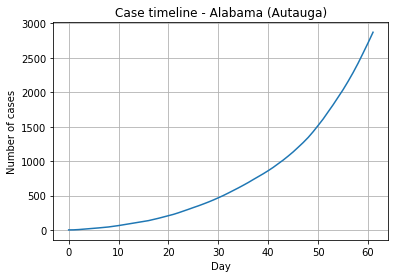

In [33]:
import matplotlib.pyplot as plt

days = np.arange(0, 62, 1)

fig, ax = plt.subplots()
ax.plot(days, case_timeline)
ax.set(xlabel='Day', ylabel='Number of cases', title='Case timeline - Alabama (Autauga)')

ax.grid()
plt.show()

# The Proper Timeline
Includes time to recover
* best case: 3 weeks (21 days)

Does not include ratio of those that went into the ICU yet!<br>
**need to find ratio**

In [34]:
# Need to track cases when calculating totals - and remove when 'recovered'

# Best case senerio - keep a list of cases for each day - with date
# A list of lists of cases - cases are marked by day
infected_timeline = [[{ 'Day': 0, 'Cases': 0 }]]

for index, row in ala_aut_best_case.iterrows():
    day = index+1
    cases = row['Cases']
    day_data = { 'Day': day, 'Cases': cases }
    
    infected_timeline.append([])
    for data in infected_timeline[-2]:
        if (day - data['Day']) < 21:
            infected_timeline[-1].append(data)
    
    infected_timeline[-1].append(day_data)

infected_timeline

[[{'Day': 0, 'Cases': 0}],
 [{'Day': 0, 'Cases': 0}, {'Day': 1, 'Cases': 1}],
 [{'Day': 0, 'Cases': 0}, {'Day': 1, 'Cases': 1}, {'Day': 2, 'Cases': 4}],
 [{'Day': 0, 'Cases': 0},
  {'Day': 1, 'Cases': 1},
  {'Day': 2, 'Cases': 4},
  {'Day': 3, 'Cases': 6}],
 [{'Day': 0, 'Cases': 0},
  {'Day': 1, 'Cases': 1},
  {'Day': 2, 'Cases': 4},
  {'Day': 3, 'Cases': 6},
  {'Day': 4, 'Cases': 6}],
 [{'Day': 0, 'Cases': 0},
  {'Day': 1, 'Cases': 1},
  {'Day': 2, 'Cases': 4},
  {'Day': 3, 'Cases': 6},
  {'Day': 4, 'Cases': 6},
  {'Day': 5, 'Cases': 6}],
 [{'Day': 0, 'Cases': 0},
  {'Day': 1, 'Cases': 1},
  {'Day': 2, 'Cases': 4},
  {'Day': 3, 'Cases': 6},
  {'Day': 4, 'Cases': 6},
  {'Day': 5, 'Cases': 6},
  {'Day': 6, 'Cases': 6}],
 [{'Day': 0, 'Cases': 0},
  {'Day': 1, 'Cases': 1},
  {'Day': 2, 'Cases': 4},
  {'Day': 3, 'Cases': 6},
  {'Day': 4, 'Cases': 6},
  {'Day': 5, 'Cases': 6},
  {'Day': 6, 'Cases': 6},
  {'Day': 7, 'Cases': 7}],
 [{'Day': 0, 'Cases': 0},
  {'Day': 1, 'Cases': 1},
  {'Day': 

In [35]:
case_timeline = []

for infected in infected_timeline:
    value = 0
    for elem in infected:
        value = value + elem['Cases']
    case_timeline.append(value)
case_timeline

[0,
 1,
 5,
 11,
 17,
 23,
 29,
 36,
 43,
 53,
 63,
 75,
 87,
 99,
 111,
 123,
 135,
 152,
 169,
 188,
 207,
 226,
 248,
 269,
 288,
 308,
 327,
 348,
 369,
 392,
 414,
 437,
 461,
 486,
 511,
 538,
 566,
 597,
 622,
 647,
 673,
 702,
 736,
 766,
 799,
 835,
 876,
 919,
 966,
 1022,
 1083,
 1144,
 1215,
 1282,
 1355,
 1428,
 1509,
 1596,
 1689,
 1794,
 1901,
 2011]

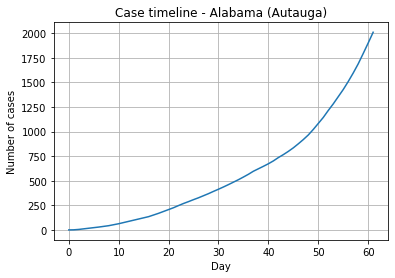

In [36]:
# Includes people recovered
import matplotlib.pyplot as plt

days = np.arange(0, 62, 1)

fig, ax = plt.subplots()
ax.plot(days, case_timeline)
ax.set(xlabel='Day', ylabel='Number of cases', title='Case timeline - Alabama (Autauga)')

ax.grid()
plt.show()